In [60]:
import pandas as pd
import gensim.models as g
from scipy import spatial
import numpy as np
import spacy 
import sent2vec
from nltk.corpus import stopwords
nlp = spacy.load('en_core_web_md')
Stoplist = set(stopwords.words('english'))
start_alpha=0.01
infer_epoch=1000

In [61]:
def cleanText(text):
    cleanedText = []
    doc = nlp(text)
    for word in doc:
        if word.text.lower() not in Stoplist and not word.is_punct:
            cleanedText.append(word.lemma_)
    return cleanedText

In [69]:
a = 'The king was walking by the river'
b = 'The queen ran along the lake'

In [70]:
a

'The king was walking by the river'

In [71]:
b

'The queen ran along the lake'

In [79]:
Similarity(a,b,'sent2vec-book')

0.3486272096633911

In [68]:
def Similarity(text1,text2,model_name):
    
    text1 = cleanText(text1)
    text2 = cleanText(text2)
    
    if model_name == 'doc2vec-wiki':
        model = model1
        vec1 = model.infer_vector(text1, alpha=start_alpha, steps=infer_epoch)
        vec2 = model.infer_vector(text2, alpha=start_alpha, steps=infer_epoch)
    elif model_name == 'doc2vec-news':
        model = model2
        vec1 = model.infer_vector(text1, alpha=start_alpha, steps=infer_epoch)
        vec2 = model.infer_vector(text2, alpha=start_alpha, steps=infer_epoch)
    elif model_name=='spacy':
        model = model3
        text1 = ' '.join(text1)
        text2 = ' '.join(text2)
        vec1 = model(text1).vector
        vec2 = model(text2).vector
    elif model_name == 'sent2vec-wiki':
        model = model4
        text1 = ' '.join(text1)
        text2 = ' '.join(text2)
        vec1 = model.embed_sentence(text1) 
        vec2 = model.embed_sentence(text2) 
    elif model_name == 'sent2vec-book':
        model = model5
        text1 = ' '.join(text1)
        text2 = ' '.join(text2)
        vec1 = model.embed_sentence(text1) 
        vec2 = model.embed_sentence(text2) 
    similarity = 1-spatial.distance.cosine(vec1,vec2)
#     dis = np.linalg.norm(vec1,vec2)
    return similarity

In [4]:
filename = 'data/short-with-different-similarity.csv'
data = pd.read_csv(filename,header=1)

In [73]:
model_name = 'pre_modle/doc2vec/enwiki/doc2vec.bin'
model1 = g.Doc2Vec.load(model_name)
model_name = 'pre_modle/doc2vec/apnews_dbow/doc2vec.bin'
model2 = g.Doc2Vec.load(model_name)
model3 = spacy.load('en_core_web_md')
model4 = sent2vec.Sent2vecModel()
model_name4 = 'pre_modle/sent2vec/wiki_unigrams.bin'
model4.load_model(model_name4)
model5 = sent2vec.Sent2vecModel()
model_name5 = 'pre_modle/sent2vec/torontobooks_unigrams.bin'
model5.load_model(model_name5)

/home/eric/.local/lib/python3.6/site-packages/gensim/models/doc2vec.py:566: UserWarning: The parameter `iter` is deprecated, will be removed in 4.0.0, use `epochs` instead.
  warnings.warn("The parameter `iter` is deprecated, will be removed in 4.0.0, use `epochs` instead.")
/home/eric/.local/lib/python3.6/site-packages/gensim/models/doc2vec.py:570: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


In [6]:
data['apnews-doc2vec'] = data.apply(lambda row:Similarity(row['text1'],row['text2'],'doc2vec-news'),axis=1)

data['enwiki-doc2vec'] = data.apply(lambda row:Similarity(row['text1'],row['text2'],'doc2vec-wiki'),axis=1)

data['spacy_model'] = data.apply(lambda row:Similarity(row['text1'],row['text2'],'spacy'),axis=1)

data['sent2vec-wiki'] = data.apply(lambda row:Similarity(row['text1'],row['text2'],'sent2vec-wiki'),axis=1)

data['sent2vec-book'] = data.apply(lambda row:Similarity(row['text1'],row['text2'],'sent2vec-book'),axis=1)

In [7]:
data

,Similarity(0-5),text1,text2,apnews-doc2vec,enwiki-doc2vec,spacy_model,sent2vec-wiki,sent2vec-book
0,5.0,A plane is taking off.,An air plane is taking off.,0.940989,0.923832,0.913210,0.845999,0.832755
1,5.0,A person is throwing a cat on to the ceiling.,A person throws a cat on the ceiling.,0.995888,0.996983,1.000000,1.000000,1.000000
2,5.0,The man is using a sledghammer to break the co...,A man breaks a slab of concrete that is lying ...,0.688162,0.735864,0.895027,0.670609,0.602399
3,4.8,Asian markets hit 3-wk high on hopes of US deb...,Asian stocks hit three-week highs on hopes of ...,0.821375,0.875974,0.939680,0.849537,0.785482
4,5.0,Three feared dead after helicopter crashes int...,Three feared dead after helicopter pub crash,0.994929,0.996317,1.000000,1.000000,1.000000
5,5.0,The polar bear is sliding on the snow.,A polar bear is sliding across the snow.,0.910261,0.919652,0.968950,0.951160,0.954318
6,5.0,A close-up of a sheep with its tongue hanging ...,Close up image of a sheep with it's tongue han...,0.925597,0.902960,0.917458,0.917675,0.895894
7,4.8,A women holds a small baby while sitting on a ...,a woman sitting on a sofa holding a baby.,0.925848,0.922263,0.980937,0.970073,0.959568
8,4.8,A little boy jumping from one chair to another.,A young boy jumping from one chair to another ...,0.847536,0.842760,0.962537,0.847316,0.831891
9,4.8,A black dog running through water.,A black dog is running through some water.,0.994477,0.995500,1.000000,1.000000,1.000000


# Conclusion  for short sentence
1. As we can see from comparing the similarity 'label' and predicted similarity values, the results of 5 models are quilt similar and all of them can roughly reflect the similarity between texts. 

2. More specifically, the differences between most similarity, rough similarity and no similarity are not very obvious when using `spacy` model, the similarity values are always higher than others. And `sent2vec` model have better performance in no similarity situation while wrose performance in most similarity situation than `doc2vec` model.

In [8]:
filename2 = 'data/midlength.csv'
mid_data = pd.read_csv(filename2,header=1)

In [9]:
mid_data

,category,text1,text2
0,aquaman film,Aquaman is a 2018 American superhero film base...,Aquaman is a 2018 American superhero movie bas...
1,War horse film,War Horse is a 2011 war drama film directed an...,"""War Horse"" is a 2011 war film produced by Ste..."
2,news cnn,France's beleaguered President Emmanuel Macron...,"France’s troubled president, Emmanuel Macron, ..."
3,news cnn,SoftBank is raising $23.5 billion from the IPO...,Softbank raised $23.5 billion from its initial...
4,book,Winter is coming. Such is the stern motto of H...,winter is here. This is the grim motto of Hous...
5,book,Larry Page and Sergey Brin started out as two ...,Larry Page and Sergey Brin were originally stu...


In [10]:
mid_data['apnews-doc2vec'] = mid_data.apply(lambda row:Similarity(row['text1'],row['text2'],'doc2vec-news'),axis=1)

mid_data['enwiki-doc2vec'] = mid_data.apply(lambda row:Similarity(row['text1'],row['text2'],'doc2vec-wiki'),axis=1)

mid_data['spacy_model'] = mid_data.apply(lambda row:Similarity(row['text1'],row['text2'],'spacy'),axis=1)

mid_data['sent2vec-wiki'] = mid_data.apply(lambda row:Similarity(row['text1'],row['text2'],'sent2vec-wiki'),axis=1)

mid_data['sent2vec-book'] = mid_data.apply(lambda row:Similarity(row['text1'],row['text2'],'sent2vec-book'),axis=1)

In [11]:
mid_data

,category,text1,text2,apnews-doc2vec,enwiki-doc2vec,spacy_model,sent2vec-wiki,sent2vec-book
0,aquaman film,Aquaman is a 2018 American superhero film base...,Aquaman is a 2018 American superhero movie bas...,0.813662,0.808581,0.987220,0.949630,0.934225
1,War horse film,War Horse is a 2011 war drama film directed an...,"""War Horse"" is a 2011 war film produced by Ste...",0.565123,0.626069,0.980515,0.930960,0.941416
2,news cnn,France's beleaguered President Emmanuel Macron...,"France’s troubled president, Emmanuel Macron, ...",0.619763,0.749756,0.987991,0.901309,0.916684
3,news cnn,SoftBank is raising $23.5 billion from the IPO...,Softbank raised $23.5 billion from its initial...,0.862888,0.794714,0.989073,0.881828,0.861980
4,book,Winter is coming. Such is the stern motto of H...,winter is here. This is the grim motto of Hous...,0.646837,0.716216,0.985169,0.901795,0.929474
5,book,Larry Page and Sergey Brin started out as two ...,Larry Page and Sergey Brin were originally stu...,0.876634,0.875314,0.996401,0.942708,0.945079


In [29]:
length = len(mid_data)
doc_wiki_similarity_matrix = np.zeros([length,length])
for i in range(length):
    for j in range(length):
        doc_wiki_similarity_matrix[i][j] = Similarity(mid_data['text1'][i],mid_data['text1'][j],'doc2vec-wiki')
doc_wiki_similarity_matrix

array([[0.99731445, 0.21581405, 0.15599056, 0.16480331, 0.134446  ,
        0.08293127],
       [0.21018738, 0.99729663, 0.13252205, 0.22369686, 0.04420083,
        0.23202498],
       [0.14947909, 0.13835289, 0.99754429, 0.21963757, 0.10716819,
        0.16266316],
       [0.17123395, 0.22618191, 0.21458954, 0.99747044, 0.10365105,
        0.25678715],
       [0.14392978, 0.046594  , 0.09751491, 0.11291826, 0.99778134,
        0.19776569],
       [0.08203812, 0.24202962, 0.15909469, 0.26074922, 0.19760226,
        0.9978081 ]])

In [30]:
length = len(mid_data)
doc_news_similarity_matrix = np.zeros([length,length])
for i in range(length):
    for j in range(length):
        doc_news_similarity_matrix[i][j] = Similarity(mid_data['text1'][i],mid_data['text1'][j],'doc2vec-news')
doc_news_similarity_matrix

array([[0.9968909 , 0.16280739, 0.14173245, 0.13735011, 0.16581725,
        0.10709067],
       [0.16241267, 0.99692965, 0.00544766, 0.16304564, 0.06182747,
        0.04420014],
       [0.14352804, 0.0083732 , 0.99613637, 0.19121552, 0.11910781,
        0.03413794],
       [0.1363714 , 0.16411805, 0.1920106 , 0.99692279, 0.04693313,
        0.10878582],
       [0.16268101, 0.05389598, 0.12622261, 0.04090607, 0.99652582,
        0.0745259 ],
       [0.11337509, 0.04595864, 0.03855558, 0.11901323, 0.07967521,
        0.99667794]])

In [31]:
length = len(mid_data)
Spacy_similarity_matrix = np.zeros([length,length])
for i in range(length):
    for j in range(length):
        Spacy_similarity_matrix[i][j] = Similarity(mid_data['text1'][i],mid_data['text1'][j],'spacy')
Spacy_similarity_matrix

array([[1.        , 0.92772526, 0.72999591, 0.66184801, 0.81031102,
        0.79786593],
       [0.92772526, 1.        , 0.75245023, 0.69731605, 0.80058205,
        0.82682389],
       [0.72999591, 0.75245023, 1.        , 0.79818058, 0.77867723,
        0.88094389],
       [0.66184801, 0.69731605, 0.79818058, 1.        , 0.61613399,
        0.83382994],
       [0.81031102, 0.80058205, 0.77867723, 0.61613399, 1.        ,
        0.76698291],
       [0.79786593, 0.82682389, 0.88094389, 0.83382994, 0.76698291,
        1.        ]])

In [32]:
length = len(mid_data)
sent2vec_wiki_similarity_matrix = np.zeros([length,length])
for i in range(length):
    for j in range(length):
        sent2vec_wiki_similarity_matrix[i][j] = Similarity(mid_data['text1'][i],mid_data['text1'][j],'sent2vec-wiki')
sent2vec_wiki_similarity_matrix

array([[1.        , 0.61014009, 0.38175514, 0.27626565, 0.46372506,
        0.44519082],
       [0.61014009, 1.        , 0.35510904, 0.29533574, 0.48252979,
        0.45985863],
       [0.38175514, 0.35510904, 1.        , 0.33894649, 0.34196723,
        0.38124728],
       [0.27626565, 0.29533574, 0.33894649, 1.        , 0.24845861,
        0.40929586],
       [0.46372506, 0.48252979, 0.34196723, 0.24845861, 1.        ,
        0.4164612 ],
       [0.44519082, 0.45985863, 0.38124728, 0.40929586, 0.4164612 ,
        1.        ]])

In [33]:
length = len(mid_data)
sent2vec_book_similarity_matrix = np.zeros([length,length])
for i in range(length):
    for j in range(length):
        sent2vec_book_similarity_matrix[i][j] = Similarity(mid_data['text1'][i],mid_data['text1'][j],'sent2vec-book')
sent2vec_book_similarity_matrix

array([[1.        , 0.66493732, 0.40956378, 0.31983775, 0.45252928,
        0.52453613],
       [0.66493732, 1.        , 0.43538448, 0.32854068, 0.43098626,
        0.51314557],
       [0.40956378, 0.43538448, 1.        , 0.31168911, 0.3744334 ,
        0.44613749],
       [0.31983775, 0.32854068, 0.31168911, 1.        , 0.24469551,
        0.38942701],
       [0.45252928, 0.43098626, 0.3744334 , 0.24469551, 1.        ,
        0.39667109],
       [0.52453613, 0.51314557, 0.44613749, 0.38942701, 0.39667109,
        1.        ]])

# Conclusion for paragraph(mid length)
1. Obviously, `sent2vec` and `spacy` models perform better than `doc2vec` since they have high values for two most similar texts.

2. As we can see results of similarity between totally different texts, `spacy` model did the worst performance since it has high similarity value. additionly, `doc2vec` performs better than `sent2vec` since it has very low value for totally different text.

In [39]:
filename3 = 'data/large.csv'
large_data = pd.read_csv(filename3,header=1)

In [40]:
large_data

,Similarity,text1,text2
0,aquaman film,"In 1912, a teenage boy named Albert Narracott ...","In 1912, a teenage boy named Jeremy Irvine fro..."
1,Book,Winter is coming. Such is the stern motto of H...,winter is here. This is the grim motto of Hous...
2,news healthy,Most US adults have not gotten a flu shot this...,According to a new survey by the University of...


In [41]:
large_data['apnews-doc2vec'] = large_data.apply(lambda row:Similarity(row['text1'],row['text2'],'doc2vec-news'),axis=1)

large_data['enwiki-doc2vec'] = large_data.apply(lambda row:Similarity(row['text1'],row['text2'],'doc2vec-wiki'),axis=1)

large_data['spacy_model'] = large_data.apply(lambda row:Similarity(row['text1'],row['text2'],'spacy'),axis=1)

large_data['sent2vec-wiki'] = large_data.apply(lambda row:Similarity(row['text1'],row['text2'],'sent2vec-wiki'),axis=1)

large_data['sent2vec-book'] = large_data.apply(lambda row:Similarity(row['text1'],row['text2'],'sent2vec-book'),axis=1)

In [42]:
large_data

,Similarity,text1,text2,apnews-doc2vec,enwiki-doc2vec,spacy_model,sent2vec-wiki,sent2vec-book
0,aquaman film,"In 1912, a teenage boy named Albert Narracott ...","In 1912, a teenage boy named Jeremy Irvine fro...",0.750486,0.787303,0.998505,0.891484,0.883031
1,Book,Winter is coming. Such is the stern motto of H...,winter is here. This is the grim motto of Hous...,0.685813,0.693092,0.989655,0.901795,0.929474
2,news healthy,Most US adults have not gotten a flu shot this...,According to a new survey by the University of...,0.746555,0.818245,0.995050,0.798488,0.774948


In [43]:
length = len(large_data)
doc_news_similarity_matrix = np.zeros([length,length])
for i in range(length):
    for j in range(length):
        doc_news_similarity_matrix[i][j] = Similarity(large_data['text1'][i],large_data['text1'][j],'doc2vec-news')
doc_news_similarity_matrix

array([[0.9938013 , 0.09592321, 0.06730756],
       [0.09503138, 0.99717194, 0.17279464],
       [0.06566888, 0.16566174, 0.99778038]])

In [45]:
length = len(large_data)
doc_wiki_similarity_matrix = np.zeros([length,length])
for i in range(length):
    for j in range(length):
        doc_wiki_similarity_matrix[i][j] = Similarity(large_data['text1'][i],large_data['text1'][j],'doc2vec-wiki')
doc_wiki_similarity_matrix

array([[0.99862653, 0.25673881, 0.19791135],
       [0.25330362, 0.99781716, 0.19183794],
       [0.19752719, 0.19131333, 0.99852228]])

In [46]:
length = len(large_data)
Spacy_similarity_matrix = np.zeros([length,length])
for i in range(length):
    for j in range(length):
        Spacy_similarity_matrix[i][j] = Similarity(large_data['text1'][i],large_data['text1'][j],'spacy')
Spacy_similarity_matrix

array([[1.        , 0.88152868, 0.79017919],
       [0.88152868, 1.        , 0.70845801],
       [0.79017919, 0.70845801, 1.        ]])

In [47]:
length = len(large_data)
sent2vec_book_similarity_matrix = np.zeros([length,length])
for i in range(length):
    for j in range(length):
        sent2vec_book_similarity_matrix[i][j] = Similarity(large_data['text1'][i],large_data['text1'][j],'sent2vec-book')
sent2vec_book_similarity_matrix

array([[1.        , 0.5105859 , 0.32040313],
       [0.5105859 , 1.        , 0.29384309],
       [0.32040313, 0.29384309, 1.        ]])

In [48]:
length = len(large_data)
sent2vec_wiki_similarity_matrix = np.zeros([length,length])
for i in range(length):
    for j in range(length):
        sent2vec_wiki_similarity_matrix[i][j] = Similarity(large_data['text1'][i],large_data['text1'][j],'sent2vec-wiki')
sent2vec_wiki_similarity_matrix

array([[1.        , 0.51544517, 0.32921278],
       [0.51544517, 1.        , 0.27732709],
       [0.32921278, 0.27732709, 1.        ]])

# Conclusion for document(large length)
1. As we can see results of similarity between totally different texts, the results are quilt similar with mid length.  `spacy` model did the worst performance since it has high similarity value. additionly, `doc2vec` has a very well performance when the text are large!

# Final decision
I prefer to use `sent2vec` model in our project since it works well in short and mid length situation. Also, we usually have short and totally different texts in our project and `sent2vec` model is the most suitable model among three models.

In [20]:
a = '    1) http://edusearch.coagmento.org/instruments/mdp/01%20GMFreeze.ht     2)http://edusearch.coagmento.org/instruments/mdp/12%20Williams.htm     3http://edusearch.coagmento.org/instruments/mdp/16%20Oduke%20Powles.htm) '

In [34]:
doc = nlp(b)

In [35]:
for word in doc :
    print(word)
    
#     print(word.like_url)

    
1
)
 
http:/edusearch.coagmento.org
/
instruments
/
mdp/01%20GMFreeze.ht
    
2
)
http:/edusearch.coagmento.org
/
instruments
/
mdp/12%20Williams.htm
    
3
http:/edusearch.coagmento.org
/
instruments
/
mdp/16%20Oduke%20Powles.htm
)


In [19]:
'http:' in a

True

In [57]:
b = a.replace('//','/')

In [58]:
b

'    1) http:/edusearch.coagmento.org/instruments/mdp/01%20GMFreeze.ht     2)http:/edusearch.coagmento.org/instruments/mdp/12%20Williams.htm     3http:/edusearch.coagmento.org/instruments/mdp/16%20Oduke%20Powles.htm) '

In [59]:
for word in nlp(b):
    print(word)
    print(word.like_url)

    
False
1
False
)
False
http:/edusearch.coagmento.org
True
/
False
instruments
False
/
False
mdp/01%20GMFreeze.ht
True
    
False
2)http:/edusearch.coagmento.org
True
/
False
instruments
False
/
False
mdp/12%20Williams.htm
False
    
False
3http:/edusearch.coagmento.org
True
/
False
instruments
False
/
False
mdp/16%20Oduke%20Powles.htm
False
)
False


In [10]:
group = [1,2,3,4,5]
similar = [0.1,0.22,0.13,0.54,0.35]

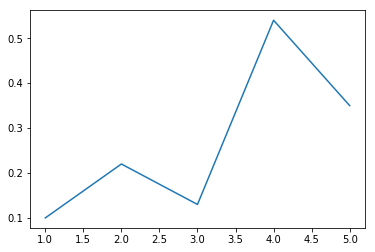

In [11]:
import seaborn as sns
sns.lineplot(group,similar)

In [ ]:
   def PlotSimilarityDistribution(self):
        group = list(self.similarity.keys())
        similarity = list(self.similarity.values())
        sns.distplot(similarity,hist=False).set(xlim=group)